<a href="https://colab.research.google.com/github/gapself/machine-learning-projects/blob/main/statistics/sampling_distributions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Random Sampling


Generate my sample with:
```
np.random.choice() 
```




In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

population = pd.read_csv("./salmon_population.csv")
population = np.array(population.Salmon_Weight)

population_mean = round(np.mean(population),3)
print(population_mean)

samp_size = 10
sample = np.random.choice(np.array(population), samp_size, replace = False)
sample_mean = sample.mean()

60.708


## Plotting the Population Distribution

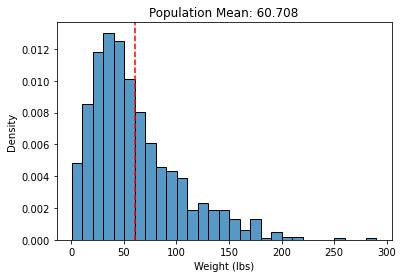

<Figure size 432x288 with 0 Axes>

In [49]:
sns.histplot(population, stat='density')
plt.axvline(population_mean,color='r',linestyle='dashed')
plt.title(f"Population Mean: {population_mean}")
plt.xlabel("Weight (lbs)")
plt.show()
plt.clf()

## Plot the sample data:

### Small sample impacts the sample mean. One sample mean vary a lot from another.

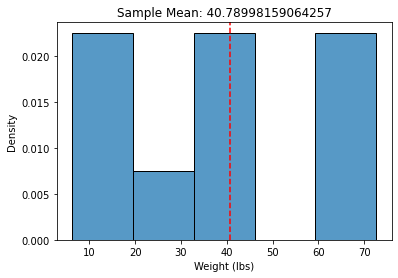

In [51]:
samp_size = 10
sample = np.random.choice(np.array(population), samp_size, replace = False)
sample_mean = sample.mean()

sns.histplot(sample, stat='density')
plt.axvline(sample_mean,color='r',linestyle='dashed')
plt.title(F"Sample Mean: {sample_mean}")
plt.xlabel("Weight (lbs)")
plt.show()

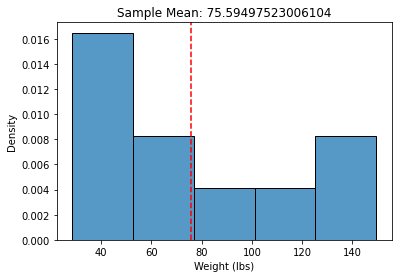

In [53]:
samp_size = 10
sample = np.random.choice(np.array(population), samp_size, replace = False)
sample_mean = sample.mean()

sns.histplot(sample, stat='density')
plt.axvline(sample_mean,color='r',linestyle='dashed')
plt.title(F"Sample Mean: {sample_mean}")
plt.xlabel("Weight (lbs)")
plt.show()

## Larger sample size

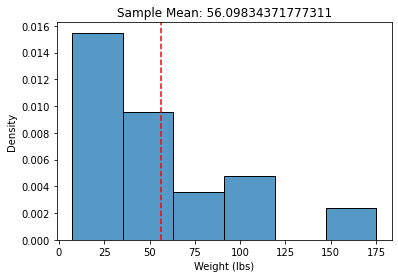

In [55]:
samp_size = 30
sample = np.random.choice(np.array(population), samp_size, replace = False)
sample_mean = sample.mean()

sns.histplot(sample, stat='density')
plt.axvline(sample_mean,color='r',linestyle='dashed')
plt.title(F"Sample Mean: {sample_mean}")
plt.xlabel("Weight (lbs)")
plt.show()

## Sampling Distributions

### Check how much variation we can expect in those sample means.



*   take 500 random samples of the same size f.ex.50 fish/sample 
*   calculate sample mean for each one
*   plot histogram







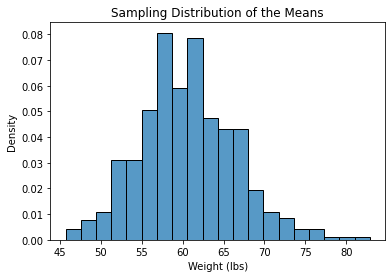

In [60]:
sample_size = 50
sample_means = []

for i in range(500):
  sample = np.random.choice(population, sample_size, replace = False)
  sample_mean = np.mean(sample)
  sample_means.append(sample_mean)

sns.histplot(sample_means,stat='density')
plt.title("Sampling Distribution of the Means")
plt.xlabel("Weight (lbs)")
plt.show()

## Central Limit Theorem (CLT)

### States that the sampling distribution of the mean is normally distributed when:
*   the population is not too skewed
*   sample size is large enough

#### Good practice: sample size of n > 30.
(if the population distribution = normal, sample size can be smaller)


❌ CLT applies to the sampling distribution of the mean and not other statistics like maximum, minimum, and variance! ❌



### CLT Small sample size below

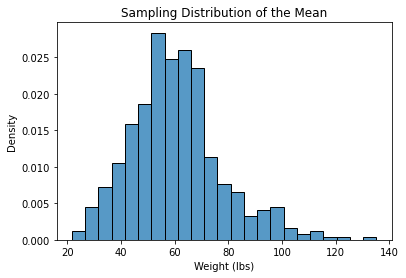

In [69]:
sample_means = []
samp_size = 6
for i in range(500):
    samp = np.random.choice(population, samp_size, replace = False)
    this_sample_mean = np.mean(samp)
    sample_means.append(this_sample_mean)

plt.clf()
sns.histplot(sample_means, stat = 'density' )
plt.title("Sampling Distribution of the Mean")
plt.xlabel("Weight (lbs)")
plt.show()

Salmon weight is skewed right = the tail of the distributions is longer in the right than on the left. 

### CLT larger sample size

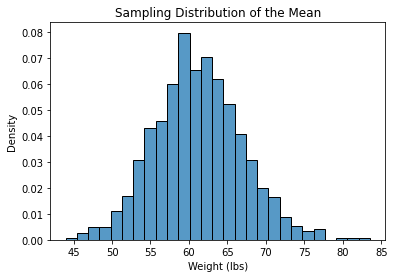

In [63]:
samp_size = 50
for i in range(500):
    samp = np.random.choice(population, samp_size, replace = False)
    this_sample_mean = np.mean(samp)
    sample_means.append(this_sample_mean)

plt.clf()
sns.histplot(sample_means, stat = 'density' )
plt.title("Sampling Distribution of the Mean")
plt.xlabel("Weight (lbs)")
plt.show()

Sampling distribution look more normal. ✅

### CLT also allows us to describe that normal distribution quantitatively. Normal distributions are described by their mean μ (mu) and standard deviation σ (sigma).


*   mean x approximately equal to the population mean μ
*   sampling stand dev: population stand dev σ // n**.5
*   Element listy


​




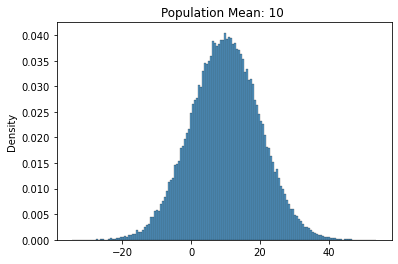

<Figure size 432x288 with 0 Axes>

In [70]:
population_mean = 10
population_std_dev = 10
samp_size = 50
samp_size = 6
# Create the population
population = np.random.normal(population_mean, population_std_dev, size = 100000)

sample_means = []
for i in range(500):
    samp = np.random.choice(population, samp_size, replace = False)
    sample_means.append(np.mean(samp))

mean_sampling_distribution = round(np.mean(sample_means),3)

# population distrib
sns.histplot(population, stat = 'density')
plt.title(f"Population Mean: {population_mean} ")
plt.xlabel("")
plt.show()
plt.clf()

Original population is normally distributed, the CLT applies even with a smaller sample size.

In [72]:
import scipy.stats as stats

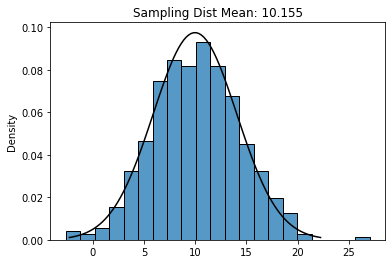

In [74]:
sns.histplot(sample_means, stat='density')
# calculate the mean and SE for the probability distribution
mu = np.mean(population)
sigma = np.std(population)/(samp_size**.5)

# plot the normal distribution with mu=popmean, sd=sd(pop)/sqrt(samp_size) on top
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)

plt.plot(x, stats.norm.pdf(x, mu, sigma), color='k', label = 'normal PDF')
plt.title(f"Sampling Dist Mean: {mean_sampling_distribution}")
plt.xlabel("")
plt.show()

### standard deviation of a sampling distribution == standard error of the estimate of the mean

if we cannot know the population standard deviation, we estimate the **standard error** using the sample standard deviation

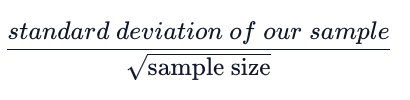



*   ⬆ sample size = ⬇ stand error
*   ⬆ popul stand dev = ⬆ stand error



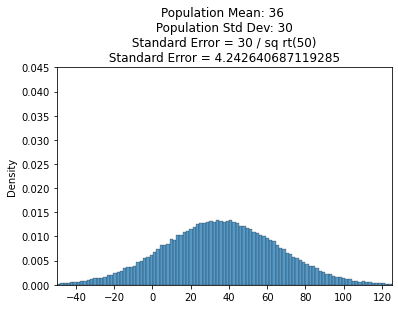

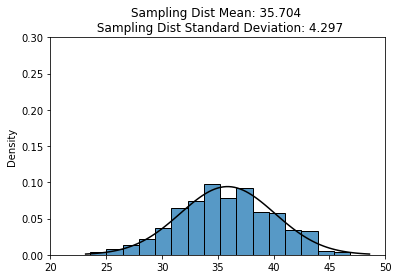

In [75]:

population_mean = 36
# population_std_dev = 10
population_std_dev = 30
# samp_size = 10
samp_size = 50

population = np.random.normal(population_mean, population_std_dev, size = 100000)

sample_means = []
for i in range(500):
    samp = np.random.choice(population, samp_size, replace = False)
    sample_means.append(np.mean(samp))

mean_sampling_distribution = round(np.mean(sample_means),3)
std_sampling_distribution = round(np.std(sample_means),3)

std_error = population_std_dev / (samp_size **0.5)

sns.histplot(population, stat = 'density')
plt.title(f"Population Mean: {population_mean} \n Population Std Dev: {population_std_dev} \n Standard Error = {population_std_dev} / sq rt({samp_size}) \n Standard Error = {std_error} ")
plt.xlim(-50,125)
plt.ylim(0,0.045)
plt.show()
plt.clf()

## sampling distribution
sns.histplot(sample_means, stat = 'density')
# calculate the mean and SE for the probability distribution
mu = np.mean(population)
sigma = np.std(population)/(samp_size**.5)

# plot the normal distribution with mu=popmean, sd=sd(pop)/sqrt(samp_size) on top
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma), color='k', label = 'normal PDF')
# plt.axvline(mean_sampling_distribution,color='r',linestyle='dashed')
plt.title(f"Sampling Dist Mean: {mean_sampling_distribution} \n Sampling Dist Standard Deviation: {std_sampling_distribution}")
plt.xlim(20,50)
plt.ylim(0,0.3)
plt.show()

### Mean as an **unbiased estimator** (when population mean = mean of sampling distribution)

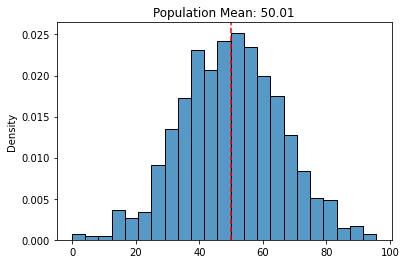

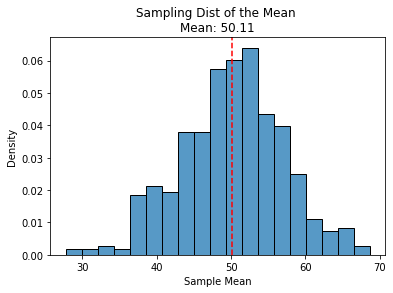

<Figure size 432x288 with 0 Axes>

In [78]:
app_stat_text = "Mean"
def app_statistic(x):
    return np.mean(x)

mean, std_dev = 50, 15
population = np.random.normal(mean, std_dev, 1000)

pop_statistic = round(app_statistic(population),2)

sns.histplot(population, stat = 'density')
plt.axvline(pop_statistic,color='r',linestyle='dashed')
plt.title(f"Population {app_stat_text}: {pop_statistic}")
plt.xlabel("")
plt.show()
plt.clf()

sample_stats = []
samp_size = 5
for i in range(500):
    samp = np.random.choice(population, samp_size, replace = False)
    this_sample_stat = app_statistic(samp)
    sample_stats.append(this_sample_stat)

sns.histplot(sample_stats, stat = 'density')
plt.title(f"Sampling Dist of the {app_stat_text} \nMean: {round(np.mean(sample_stats),2)}")
plt.axvline(np.mean(sample_stats),color='r',linestyle='dashed')
plt.xlabel(f"Sample {app_stat_text}")
plt.show()
plt.clf()

## Calculating Probabilities

We know that cod have an average weight of 36 lbs with a standard deviation of 20. We want to try to fit 25 cod fish into our same crate that can hold up to 750 lbs.

Our first step is to calculate the standard error for a sample size of 25. Using the above information, calculate the standard error and assign it to a variable called standard_error.

Now that we have our standard error, we can use the normal CDF to calculate the probability that a sample of 25 fish has a mean weight of 30 lbs. Using the function stats.norm.cdf(), calculate this probability and assign it to a variable cod_cdf.



Given the probability you calculated in the last checkpoint, would you recommend trying to carry 25 cod in the crate?



> Nope, the probability of 25 fish having an average weight of 30 or less is 10%



In [77]:
std_dev = 20
samp_size = 25
standard_error = std_dev / (samp_size**.5)
x = 30
mean=36
cod_cdf = stats.norm.cdf(x, mean, standard_error)
print(cod_cdf*100)

6.680720126885807
